In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [56]:
col_name = ['EngineNo', 'Cycle']
opt_settings = ['OpSet1', 'OpSet2', 'OpSet3']
sensor_data = ['FanInletTemp', 'LPCOutletTemp', 'HPCOutletTemp', 'LPTOutletTemp', 'FanInletPressure',
              'ByPassDuctPressure', 'TotalHPCOutletPressure', 'PhysicalFanSpeed', 'PhysicalCoreSpeed',
              'EnginePressureRatio', 'StaticHPCOutletPressure', 'FuelFlowRatio', 'CorctFanSpeed', 'CorctCoreSpeed', 'BPR', 
              'BurnerFuelRatio', 'BleedEnthalpy', 'DemandFanSpeed', 'DemandCorctFanSpeed', 'HPTCoolantBleed', 'LPTCoolantBleed']

In [57]:
# column_names = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 
#               'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 
#               'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 
#               'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
# how to read txt file with more than one space or tab: From https://stackoverflow.com/questions/22809061/read-space-separated-data-with-pandas
df_raw = pd.read_csv('train_FD001.txt', sep='\s+', header=None, names=col_name+opt_settings+sensor_data)
df_test = pd.read_csv('test_FD001.txt', sep='\s+', header=None, names=col_name+opt_settings+sensor_data)
df_test_rul = pd.read_csv('RUL_FD001.txt', header=None, names=['RUL'])

In [58]:
df_raw

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [59]:
df_test

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


# Preprocessing

In [60]:
df_raw.describe()

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


# Create Target column RUL
  

Train dataset

In [61]:
df_raw

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [62]:
# From the grouped data, use the cycle coulmn and find the max 
max_cycle = df_raw.groupby('EngineNo')['Cycle'].max()
max_cycle

EngineNo
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: Cycle, Length: 100, dtype: int64

In [63]:
# Merge the max cycle column with the df column
df_train = df_raw.merge(max_cycle.to_frame(name='max_cycle'), left_on='EngineNo', right_index=True)
del(df_raw)
df_train

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,max_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


In [64]:
df_train_rul = df_train.copy()
df_train_rul['RUL'] = df_train_rul.max_cycle - df_train_rul.Cycle
df_train_rul.drop('max_cycle', axis=1, inplace=True)

In [65]:
df_train_rul

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [66]:
# Here we can see the remaining_cycle getting reduced
df_train_rul[['EngineNo','Cycle','RUL']]

,EngineNo,Cycle,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187
...,...,...,...
20626,100,196,4
20627,100,197,3
20628,100,198,2
20629,100,199,1


#### Test data 

In [67]:
df_test

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,FuelFlowRatio,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


# EDA

In [68]:
df_train_rul[df_train_rul.EngineNo==1]

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1


In [69]:
df_train_rul[df_train_rul.EngineNo==2]

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,RUL
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,286
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,2387.98,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085,285
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,2387.99,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250,284
195,2,4,0.0035,-0.0004,100.0,518.67,641.68,1584.15,1396.08,14.62,...,2387.93,8140.44,8.4018,0.03,391,2388,100.0,39.13,23.5027,283
196,2,5,0.0005,0.0004,100.0,518.67,641.73,1579.03,1402.52,14.62,...,2387.94,8136.67,8.3867,0.03,390,2388,100.0,39.18,23.4234,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2,283,0.0046,0.0002,100.0,518.67,643.78,1602.03,1429.67,14.62,...,2388.20,8174.85,8.5199,0.03,398,2388,100.0,38.42,23.0358,4
475,2,284,-0.0006,0.0001,100.0,518.67,643.91,1601.35,1430.04,14.62,...,2388.21,8166.83,8.5291,0.03,395,2388,100.0,38.23,23.1196,3
476,2,285,-0.0007,0.0004,100.0,518.67,643.67,1596.84,1431.17,14.62,...,2388.22,8164.83,8.5242,0.03,396,2388,100.0,38.39,23.1155,2
477,2,286,-0.0010,-0.0003,100.0,518.67,643.44,1603.63,1429.57,14.62,...,2388.22,8169.97,8.4932,0.03,395,2388,100.0,38.33,23.0169,1


In [70]:
df_train_rul[df_train_rul.EngineNo==3]

,EngineNo,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,RUL
479,3,1,0.0008,0.0005,100.0,518.67,642.04,1584.20,1398.13,14.62,...,2388.00,8138.40,8.4207,0.03,391,2388,100.0,38.96,23.3205,178
480,3,2,-0.0010,0.0000,100.0,518.67,642.66,1587.04,1398.62,14.62,...,2388.01,8137.38,8.3949,0.03,390,2388,100.0,39.07,23.4369,177
481,3,3,0.0013,-0.0002,100.0,518.67,642.07,1580.75,1401.10,14.62,...,2388.01,8137.20,8.3820,0.03,393,2388,100.0,39.03,23.3162,176
482,3,4,0.0008,-0.0002,100.0,518.67,642.50,1580.12,1395.76,14.62,...,2388.07,8139.35,8.3940,0.03,391,2388,100.0,38.94,23.4901,175
483,3,5,0.0020,0.0004,100.0,518.67,641.97,1581.48,1394.05,14.62,...,2388.03,8135.99,8.4233,0.03,391,2388,100.0,38.90,23.4190,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,3,175,-0.0030,0.0004,100.0,518.67,643.15,1603.74,1424.17,14.62,...,2388.14,8238.86,8.5066,0.03,396,2388,100.0,38.49,22.9909,4
654,3,176,-0.0008,0.0002,100.0,518.67,643.93,1595.61,1438.51,14.62,...,2388.12,8251.82,8.5245,0.03,396,2388,100.0,38.49,23.0656,3
655,3,177,-0.0041,-0.0002,100.0,518.67,643.68,1601.21,1423.50,14.62,...,2388.16,8249.86,8.5286,0.03,397,2388,100.0,38.37,23.0336,2
656,3,178,-0.0010,0.0001,100.0,518.67,643.66,1606.50,1430.55,14.62,...,2388.12,8253.84,8.5351,0.03,399,2388,100.0,38.57,23.1323,1


It is evident from the above data that each engines have different life cycles. Engine 1 has 192, engine 2 has 287 and engine 3 179 lifecycles.

In [71]:
df_train_rul.groupby(['EngineNo']).max().describe()

,Cycle,OpSet1,OpSet2,OpSet3,FanInletTemp,LPCOutletTemp,HPCOutletTemp,LPTOutletTemp,FanInletPressure,ByPassDuctPressure,...,CorctFanSpeed,CorctCoreSpeed,BPR,BurnerFuelRatio,BleedEnthalpy,DemandFanSpeed,DemandCorctFanSpeed,HPTCoolantBleed,LPTCoolantBleed,RUL
count,100.000000,100.000000,100.000000,100.0,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,...,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.0,100.0,100.000000,100.000000,100.000000
mean,206.310000,0.005986,0.000497,100.0,5.186700e+02,644.108800,1608.073100,1434.506400,1.462000e+01,2.161000e+01,...,2388.285100,8179.481200,8.547498,3.000000e-02,397.580000,2388.0,100.0,39.167800,23.498315,205.310000
std,46.342749,0.000883,0.000056,0.0,1.142596e-12,0.141773,2.446053,2.323773,2.856489e-14,3.570612e-14,...,0.073368,43.595736,0.012937,4.881696e-17,0.684312,0.0,0.0,0.091625,0.057682,46.342749
min,128.000000,0.004000,0.000400,100.0,5.186700e+02,643.870000,1604.070000,1429.260000,1.462000e+01,2.161000e+01,...,2388.170000,8128.370000,8.517100,3.000000e-02,396.000000,2388.0,100.0,38.970000,23.375000,127.000000
25%,177.000000,0.005375,0.000500,100.0,5.186700e+02,644.010000,1606.362500,1432.647500,1.462000e+01,2.161000e+01,...,2388.230000,8147.500000,8.537525,3.000000e-02,397.000000,2388.0,100.0,39.100000,23.454375,176.000000
50%,199.000000,0.005900,0.000500,100.0,5.186700e+02,644.090000,1607.685000,1434.230000,1.462000e+01,2.161000e+01,...,2388.280000,8157.700000,8.548250,3.000000e-02,397.500000,2388.0,100.0,39.155000,23.498900,198.000000
75%,229.250000,0.006425,0.000500,100.0,5.186700e+02,644.190000,1609.350000,1436.275000,1.462000e+01,2.161000e+01,...,2388.330000,8215.420000,8.556250,3.000000e-02,398.000000,2388.0,100.0,39.232500,23.543200,228.250000
max,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,2.161000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [72]:
def plot_for_engine(eng_num):
    '''
    A function to plot all sensor reading by giving the engine number as the input.
    '''
    fig, ax = plt.subplots(7,3, figsize=(20,26))
    count = 0
    for i in range(7):
        for j in range(3):
            # sen_num = 'SensorMeasure'+str(count)
            # sns.set_theme(font_scale=1.5)
            sns.lineplot(ax=ax[i,j],x='Cycle', y=sensor_data[count], data=df_train_rul[df_train_rul.EngineNo==eng_num])
            count+=1
    plt.savefig('engine'+str(eng_num)+'.png')

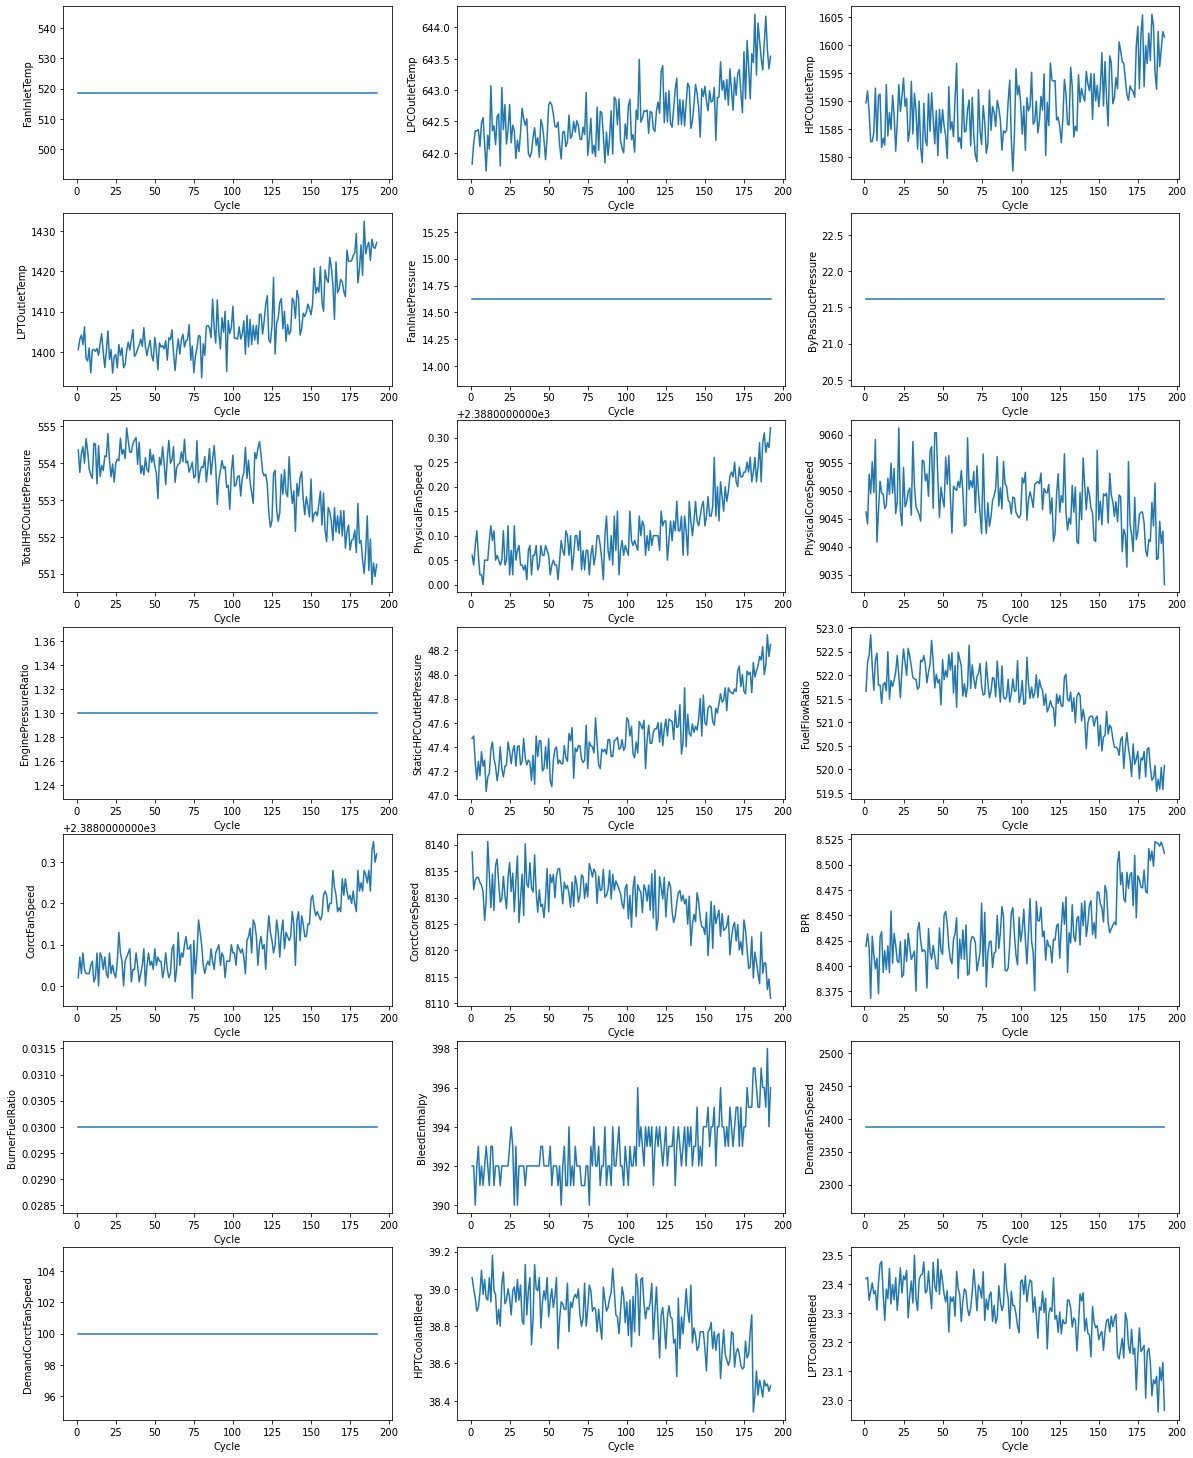

In [73]:
plot_for_engine(1)

Text(0, 0.5, 'Important Features')

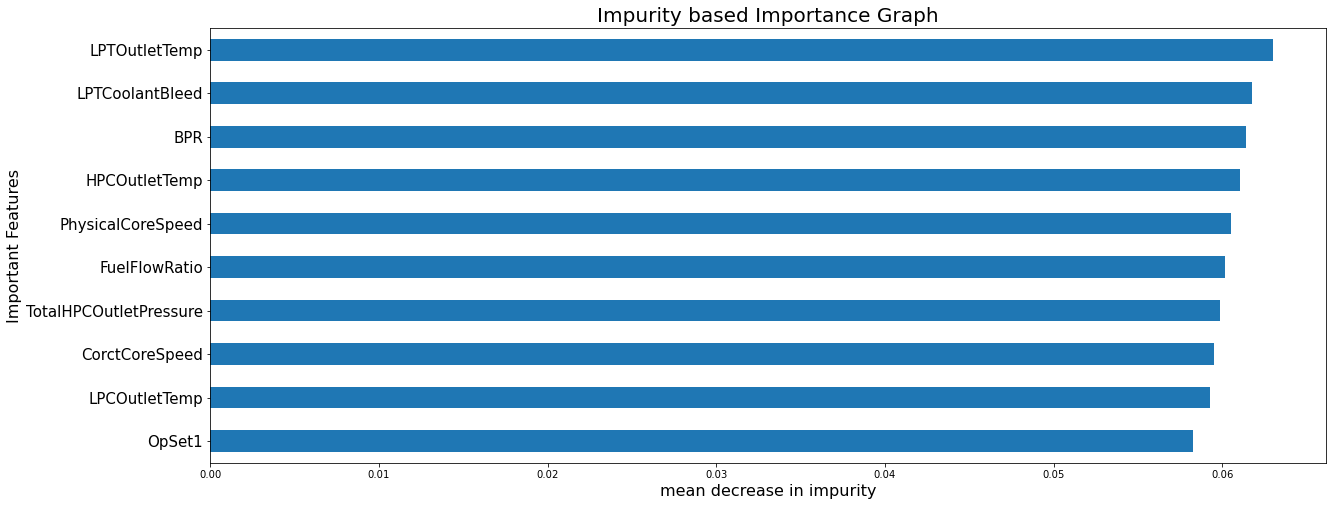

In [86]:
from sklearn.ensemble import RandomForestClassifier
X, y = df_train_rul.drop('RUL', axis=1), df_train_rul['RUL']
rfc = RandomForestClassifier(random_state=42, n_estimators=100)
rfc_model = rfc.fit(X, y)
(pd.Series(rfc_model.feature_importances_, index=X.columns)
    .nlargest(10)
    .plot(kind='barh', figsize=[20,8])
    .invert_yaxis())
plt.yticks(size=15)
plt.title('Impurity based Importance Graph', size=20)
plt.xlabel("mean decrease in impurity", fontsize = 16)
plt.ylabel("Important Features", fontsize = 16)

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_importances'

In [75]:
FanInletTemp
FanInletPressure
ByPassDuctPressure
EnginePressureRatio
BurnerFuelRatio
DemandFanSpeed
DemandCorctFanSpeed

NameError: name 'FanInletTemp' is not defined

In [ ]:
df = pd.read_csv('train_FD001.txt', sep='\s+')
df